In [1]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 1. Load Dataset menggunakan pandas
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1: Preprocessing Data
# 1.1 Load dataset
df = pd.read_csv('diabetes.csv')
# Lihat 5 data teratas untuk memastikan dataset telah dimuat
print("Head:\n", df.head())  # Tampilkan beberapa baris data
print("\nDeskripsi Statistik:\n", df.describe())  # Statistik dasar

Head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Deskripsi Statistik:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807

In [4]:
# 1.2 Eksplorasi Data
print("\nCek Missing Values:\n", df.isnull().sum())  # Cek missing values


Cek Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# 1.3 Tangani Missing Values
imputer = SimpleImputer(strategy='mean')  # Gunakan mean untuk imputasi
df[['SkinThickness', 'Insulin']] = imputer.fit_transform(df[['SkinThickness', 'Insulin']])

In [6]:
# 1.4 Encoding (tidak perlu karena tidak ada fitur kategori)

In [7]:
# 1.5 Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))  # Standarisasi fitur numerik
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [8]:
print("\nData Setelah Scaling:\n", df_scaled.head())


Data Setelah Scaling:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


In [9]:
# 2: Klasifikasi Menggunakan Logistic Regression
# Import library untuk klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
# 2.1 Pisahkan data menjadi data latih dan data uji
X = df_scaled  # Semua fitur kecuali 'Outcome'
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# 2.2 Terapkan Logistic Regression
# Melatih Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Prediksi dan evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
print(f"Akurasi: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)

Akurasi: 0.7359307359307359
Confusion Matrix:
 [[120  31]
 [ 30  50]]


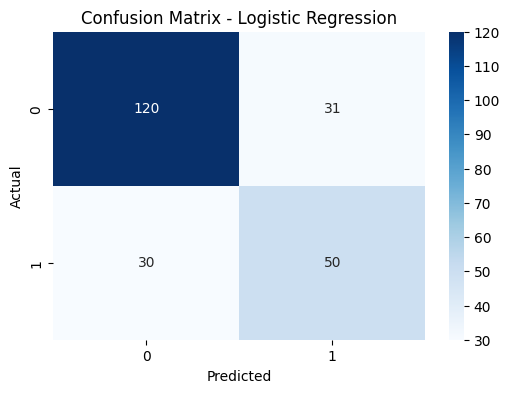

In [14]:
# 2.3 Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
#  3: Regresi Menggunakan Linear Regression Tidak dilakukan karena
#karena Regresi Menggunakan Linear Regressio Tidak Cocok digunakan untuk Dataset Diabetes 
#ini karena bukan variabel berkelanjutan seperti seperti prediksi harga atau berat badan

In [16]:
# 3:  Penggunaan Algoritma Alternatif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Inisialisasi model alternatif
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [18]:
# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc}")

KNN Accuracy: 0.6926406926406926
Decision Tree Accuracy: 0.7012987012987013
Random Forest Accuracy: 0.7575757575757576


In [19]:
# 4: Visualisasi Data dan Hasil Model

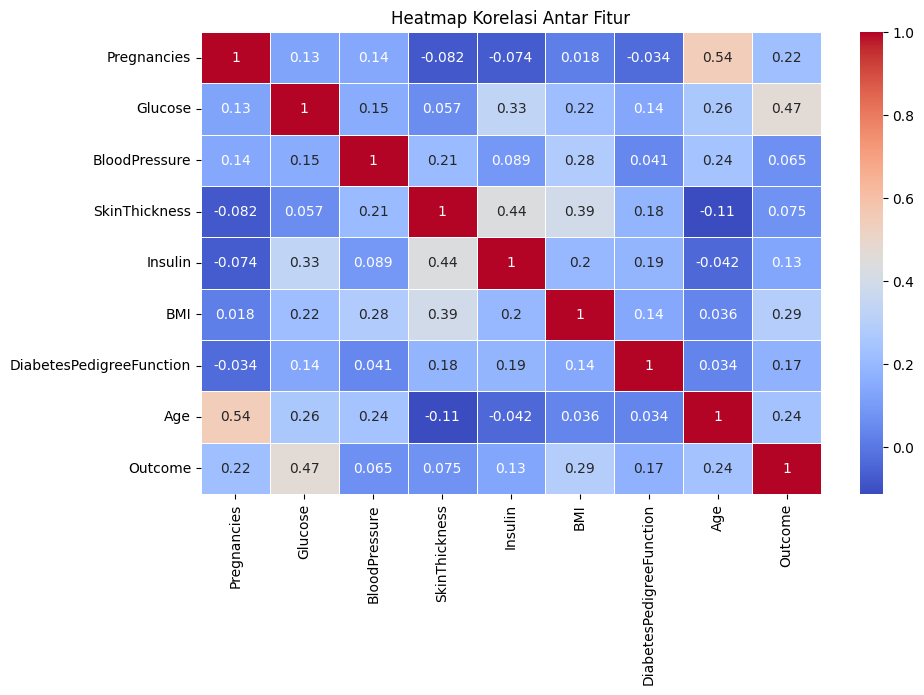

In [20]:
# 4.1 Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

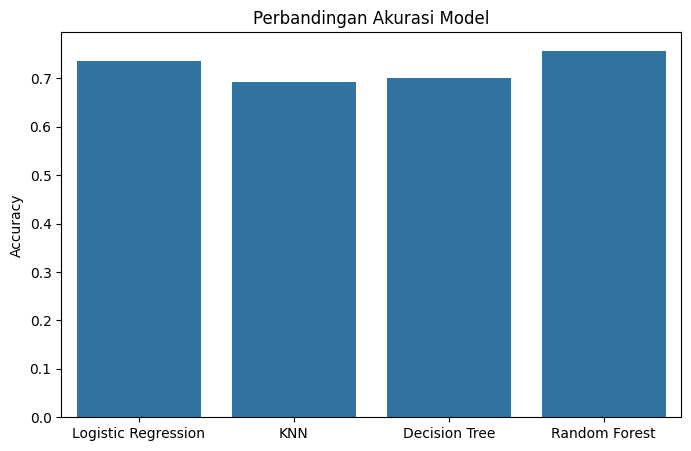

In [21]:
# 4.2 Bandingkan performa model dalam bentuk plot
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy,
    accuracy_score(y_test, models['KNN'].predict(X_test)),
    accuracy_score(y_test, models['Decision Tree'].predict(X_test)),
    accuracy_score(y_test, models['Random Forest'].predict(X_test))
]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.show()

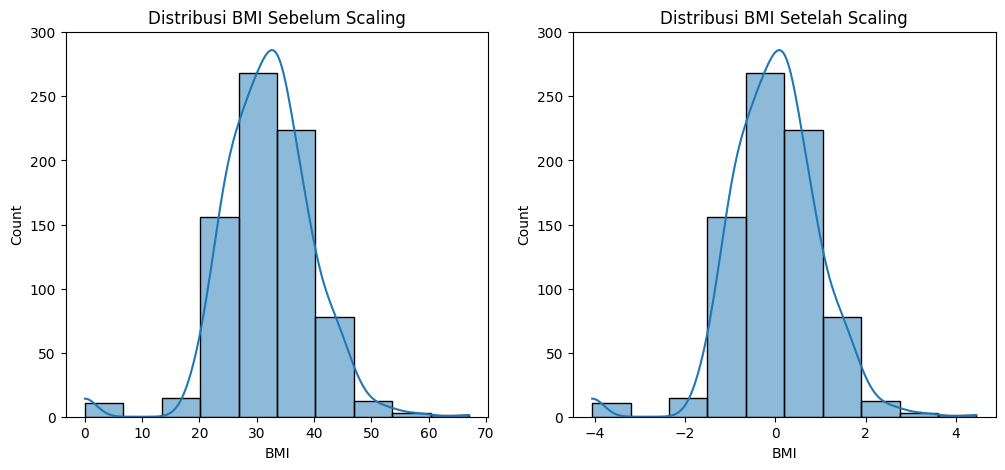

In [22]:
# 4.3 Distribusi BMI sebelum dan sesudah scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['BMI'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribusi BMI Sebelum Scaling")

sns.histplot(df_scaled['BMI'], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Distribusi BMI Setelah Scaling")

plt.show()